In [1]:
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import sleepPy.preprocessing as prep
import sleepPy.plots as plot
import actiPy.actogram_plot as aplot

In [2]:
def quickplot_h(data):
    data.resample("H").mean().plot(subplots=True,
                                  figsize=(10,10))
def quickplot(data):
    data.plot(subplots=True,
               figsize=(10,10))

In [3]:
col_names = ["Chamber", "PIR1", "PIR2", "PIR3", "PIR4", "PIR5", "PIR6", "LDR"]

In [4]:
pir_files_dir = pathlib.Path('/Users/angusfisk/Documents/01_PhD_files/09_pirdata')

exp_filesdir = pir_files_dir / "03_experiment_files"

save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/04_ageing/01_datafiles/01_activity")


In [5]:
# read df's in
exp = sorted(exp_filesdir.glob("exp_5*"))

file = exp[6]
df = pd.read_csv(file, 
                 index_col=[0],
                 parse_dates=True)

In [6]:
df.columns=col_names
df.drop(col_names[0], axis=1, inplace=True)
df.sort_index(inplace=True)

In [7]:
df.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-11-22 16:51:55.608,0.0,0.0,0.0,0.0,0.0,30.0,393.0
2017-11-22 16:52:05.606,0.0,0.0,0.0,0.0,0.0,28.0,384.0
2017-11-22 16:52:15.604,0.0,0.0,0.0,0.0,0.0,28.0,382.0
2017-11-22 16:52:25.601,0.0,0.0,0.0,0.0,0.0,32.0,382.0
2017-11-22 16:52:35.599,0.0,0.0,0.0,0.0,0.0,31.0,381.0


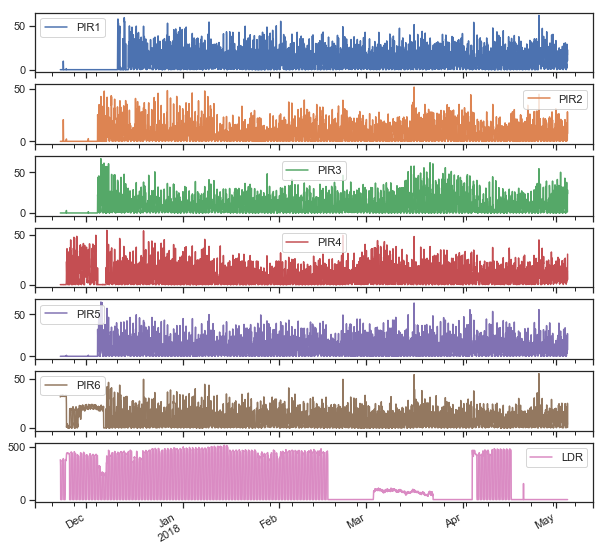

In [8]:
quickplot_h(df)

Next step - find hte post disrupted period of group housing and save it as a post file 


In [9]:
start_post = '2017-10-05'
end_post = '2017-11-23'

post_data = df.loc[start_post:end_post].copy()

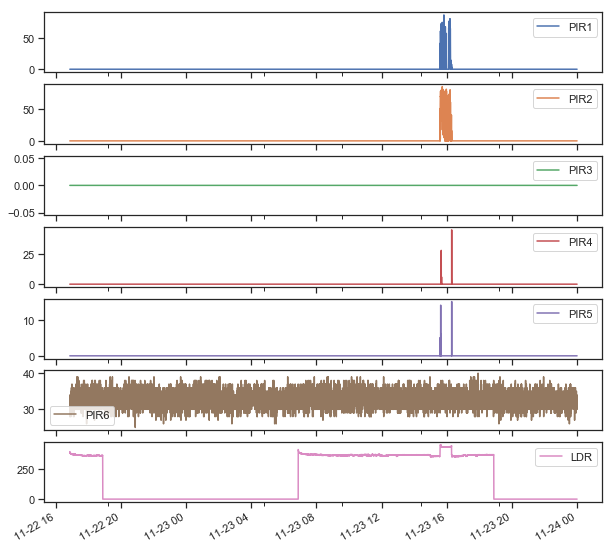

In [10]:
quickplot(post_data)

In [11]:
post_data.tail()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-11-23 23:59:11.466,0.0,0.0,0.0,0.0,0.0,31.0,0.0
2017-11-23 23:59:21.464,0.0,0.0,0.0,0.0,0.0,30.0,0.0
2017-11-23 23:59:31.462,0.0,0.0,0.0,0.0,0.0,30.0,0.0
2017-11-23 23:59:41.460,0.0,0.0,0.0,0.0,0.0,31.0,0.0
2017-11-23 23:59:51.457,0.0,0.0,0.0,0.0,0.0,31.0,0.0


Final Step have to fix the LDR values


In [12]:
day_data = post_data.between_time("04:00:00", "16:00:00")
day_data.iloc[:, -1] = 500
day_data

//anaconda/envs/sleepPy_environment/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-11-23 04:00:06.813,0.0,0.0,0.0,0.0,0.0,33.0,500
2017-11-23 04:00:16.811,0.0,0.0,0.0,0.0,0.0,32.0,500
2017-11-23 04:00:26.809,0.0,0.0,0.0,0.0,0.0,36.0,500
2017-11-23 04:00:36.807,0.0,0.0,0.0,0.0,0.0,31.0,500
2017-11-23 04:00:46.804,0.0,0.0,0.0,0.0,0.0,33.0,500
2017-11-23 04:00:56.802,0.0,0.0,0.0,0.0,0.0,34.0,500
2017-11-23 04:01:06.800,0.0,0.0,0.0,0.0,0.0,30.0,500
2017-11-23 04:01:16.798,0.0,0.0,0.0,0.0,0.0,35.0,500
2017-11-23 04:01:26.796,0.0,0.0,0.0,0.0,0.0,32.0,500
2017-11-23 04:01:36.794,0.0,0.0,0.0,0.0,0.0,33.0,500


In [13]:
post_data.loc[post_data.between_time("04:00:00", "16:00:00").index, "LDR"] = 500



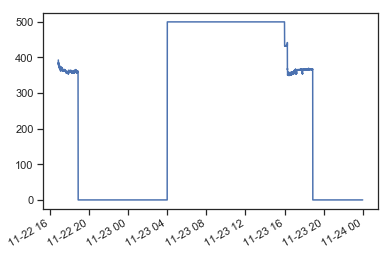

In [14]:
post_data.iloc[:, -1].plot() 


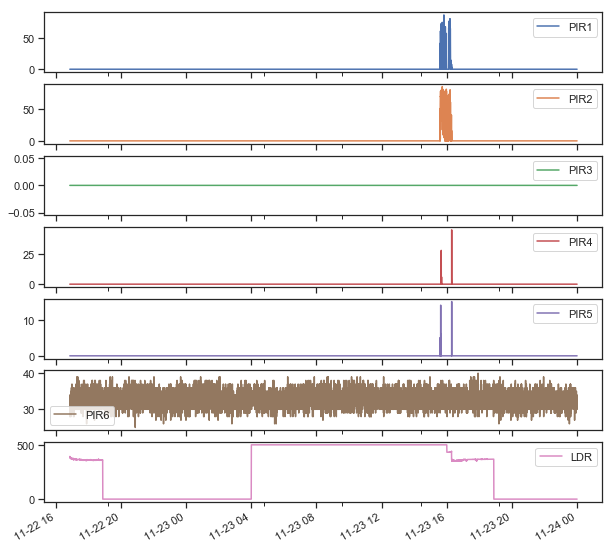

In [15]:
quickplot(post_data)


post_save_name = save_dir / "01_post_disrupt/ld_post.csv"

post_data.to_csv(post_save_name)

In [16]:
start_single = '2017-12-22'
end_single = '2018-04-03'

single_data = df.loc[start_single:end_single].copy()

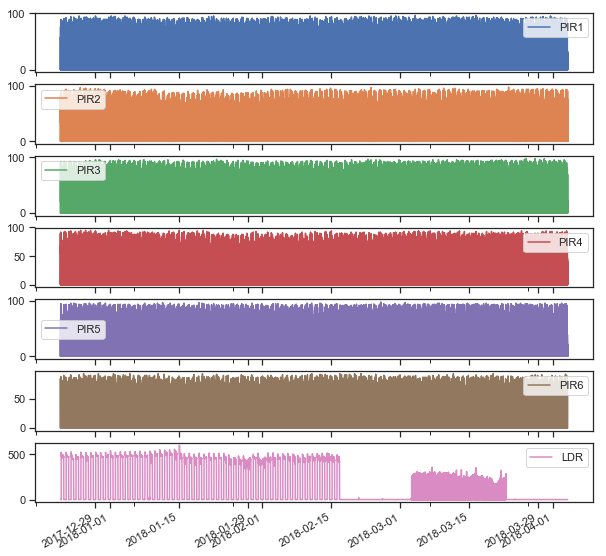

In [17]:
quickplot(single_data)

(<Figure size 720x1440 with 104 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a15781b70>)

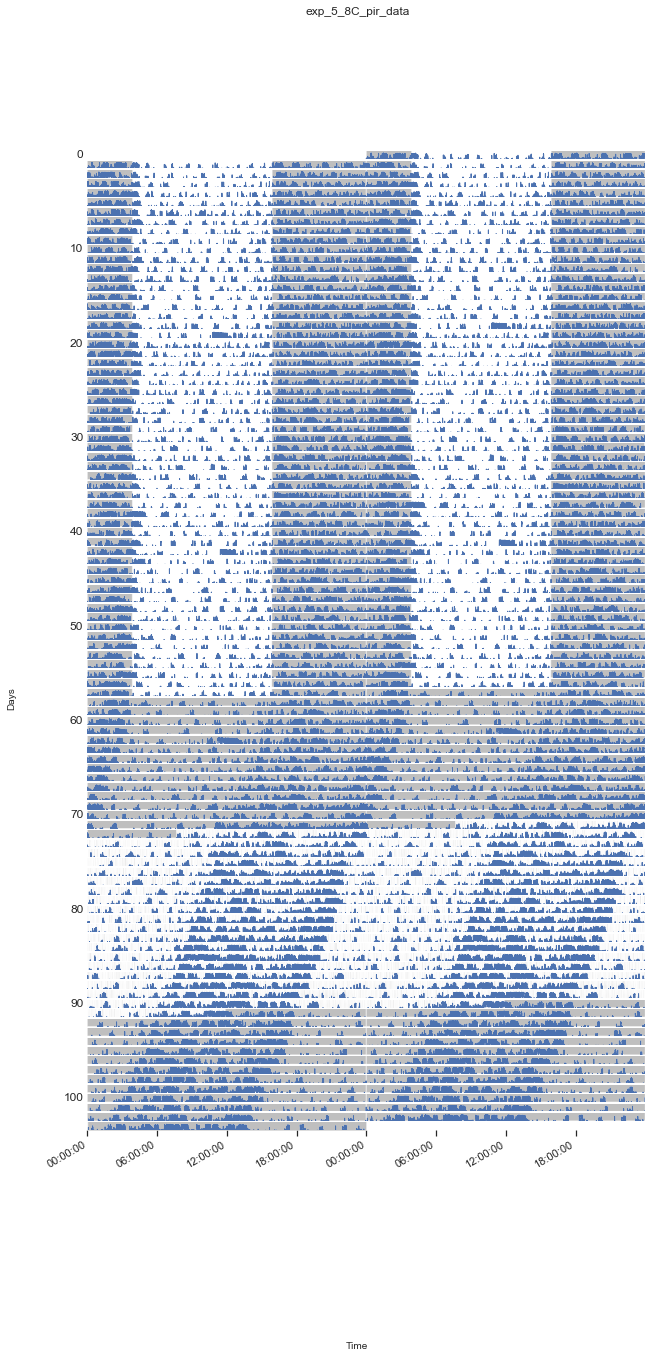

In [18]:
aplot._actogram_plot_from_df(single_data, 2, drop_level=False, fname=file, figsize=(10, 20))

In [19]:
dd_start = '2018-02-17'

ld_data = single_data.loc[start_single:dd_start]

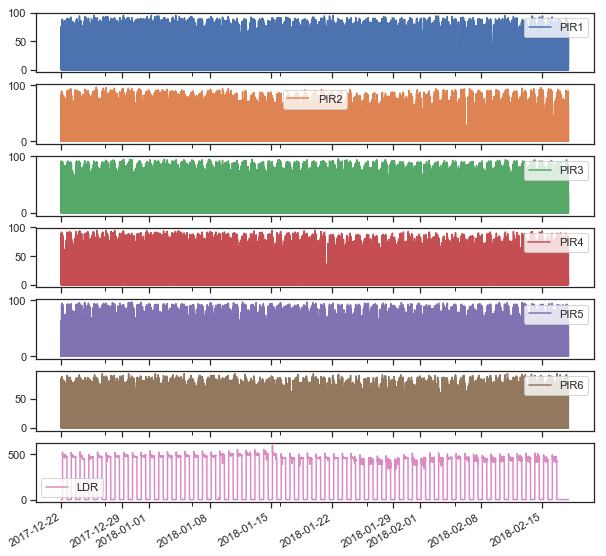

In [20]:
quickplot(ld_data)

In [21]:
label_col_name = "light_period"

In [22]:
single_data.loc[start_single:dd_start, label_col_name] = "ld"

In [23]:
dd_end = "2018-04-03"

dd_data = single_data.loc[dd_start:dd_end]

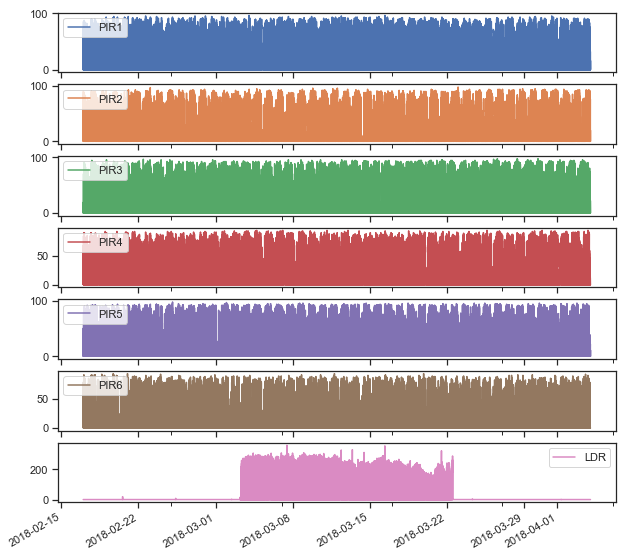

In [24]:
quickplot(dd_data)

In [25]:
single_data.loc[dd_start:dd_end, label_col_name] = "dd"

In [26]:
single_data.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR,light_period
2017-12-22 00:00:05.111,0.0,34.0,0.0,58.0,0.0,84.0,0.0,ld
2017-12-22 00:00:15.160,0.0,45.0,0.0,76.0,0.0,50.0,0.0,ld
2017-12-22 00:00:25.156,0.0,6.0,12.0,48.0,0.0,31.0,0.0,ld
2017-12-22 00:00:35.105,0.0,10.0,0.0,17.0,0.0,0.0,0.0,ld
2017-12-22 00:00:45.172,0.0,66.0,0.0,72.0,0.0,50.0,0.0,ld


In [28]:
single_save_name = save_dir / "03_single_housed/ld_01.csv"

single_data.to_csv(single_save_name)